<a href="https://colab.research.google.com/github/andipasti/smupo/blob/main/Classic_LLM_openai_18_04_24_2214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Now you can proceed with your code that requires this environment variable
from google.colab import userdata
os.environ['HUGGINGFACE_TOKEN'] = userdata.get('HUGGINGFACE_TOKEN')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
# Loading the dataset from a JSON file
df = pd.read_json('./drive/Othercomputers/X1/code/datas_small.json')
display(df)

,issue_id,issue_title,issue_description,journal_id,journal_created_on,journal_notes,journal_author
0,116550,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen\r\n\r\nIch habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon.\r\n\r\nDie Kantonsschule Wiedikon wünscht eine Layout Anpassung für mobile Geräte zu machen für das Video welches auf der Webseite der KWI (Baustand der Hohlstrasse) hochgeladen wurde. Die Kontaktperson (bei früheren Anpassungen) bei euch war Noemi Schmid. Die Schule wünscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen.\r\nWäre eine Kontaktaufnahme seitens von euch möglich?\r\n\r\nDieses Ticket eilt ein wenig da es schon länger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne Rückmeldung bis jetzt.\r\n \r\nFreundliche Grüsse\r\nKushtrim Veliji\r\n——\r\nBildungsdirektion Kanton Zürich\r\nMittelschul- und Berufsbildungsamt\r\nDigital Service Center Sek II\r\nAusstellungsstrasse 80\r\n8090 Zürich\r\nTelefon 043 259 77 27",266857,2024-03-25 10:02:24,Bist du da dran?,0
1,116543,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n",266830,2024-03-25 08:10:04,\r\nServicedesk: Ich habe eine Test Mail erfolglos gesendet. Von Zimbra an andreas.stoessel@mba.zh.ch\r\n!clipboard-202403250810-kmwuh.png!\r\n,0
2,116538,Fwd: [MBA#1128639] AW: Druckereinstellungen Sekretariat KFR,"Hallo\r\n\r\nSeit der Umstellung auf Leunet hat die KFR Schwierigkeiten beim Drucken mit\r\ndem Drucker Canon ImageRunner Advance C5560i, IP: 10.95.36.110\r\nDie Probleme treten nur in der VDI auf. Jedes Mal, wenn sie drucken wollen,\r\nmüssen sie zuerst den Drucker in der Liste anwählen, da dieser nicht als\r\nStandard eingestellt ist und es müssen auch alle weiteren Einstellungen wie\r\n«einseitig drucken» neu ausgewählt werden. Ausserdem druckt es immer nur ein\r\nExemplar aus, auch wenn man die Anzahl der Exemplare anpasst. Das Papierfach\r\nwird ebenfalls willkürlich ausgewählt. Habt ihr eine Idee wie man das beheben\r\nkönnte? Ihr könnt gerne etwas versuchen und wir testen das dann. Falls ihr\r\nnoch mehr Infos benötigt, dann liefere ich diese gerne nach. Danke!\r\n\r\nVG\r\nMax",266812,2024-03-22 14:21:52,Ist der Drucker in der Tabelle eingetragen?,0
3,116163,KEN: mobile App aufschalten,Einfach mal alle Module freischalten,264884,2024-02-13 12:01:04,LDAP: ou und upn sind jetzt vorhanden,0


In [20]:
column_names = list(df.columns)
print(column_names)

['issue_id', 'issue_title', 'issue_description', 'journal_id', 'journal_created_on', 'journal_notes', 'journal_author']


In [21]:
df.drop(['journal_id', 'journal_created_on', 'journal_author', 'journal_notes', 'issue_id'], axis=1, inplace=True)


In [22]:
column_names = list(df.columns)
print(column_names)


['issue_title', 'issue_description']


In [23]:
# Set Pandas display options to show the full content of 'merged_journal_notes'
pd.set_option('display.max_colwidth', None)
df.head()

,issue_title,issue_description
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"Guten Morgen\r\n\r\nIch habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon.\r\n\r\nDie Kantonsschule Wiedikon wünscht eine Layout Anpassung für mobile Geräte zu machen für das Video welches auf der Webseite der KWI (Baustand der Hohlstrasse) hochgeladen wurde. Die Kontaktperson (bei früheren Anpassungen) bei euch war Noemi Schmid. Die Schule wünscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen.\r\nWäre eine Kontaktaufnahme seitens von euch möglich?\r\n\r\nDieses Ticket eilt ein wenig da es schon länger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne Rückmeldung bis jetzt.\r\n \r\nFreundliche Grüsse\r\nKushtrim Veliji\r\n——\r\nBildungsdirektion Kanton Zürich\r\nMittelschul- und Berufsbildungsamt\r\nDigital Service Center Sek II\r\nAusstellungsstrasse 80\r\n8090 Zürich\r\nTelefon 043 259 77 27"
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r\nMelder: Laszlo Cseri\r\n\r\nProblem Zimbra:\r\n\r\nWir (kslzh.ch) können keine E-Mails senden (auch Mails von GMX und icloud.com versendet) und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E-Mails:\r\n\r\n!clipboard-202403250751-h8l4i.png!\r\n\r\n!clipboard-202403250751-h6e8a.png!\r\n\r\nEine Überprüfung mit MXToolbox zeigt bei einem SMTP-Check folgendes an: \r\n\r\n!clipboard-202403250751-2pdnb.png!\r\n\r\nDürfen wir euch bitten, das Problem sofort zu beheben?\r\n\r\nNachtrag: Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch-Domain auch betrifft:\r\n\r\n!clipboard-202403250752-fxdsc.png!\r\n"
2,Fwd: [MBA#1128639] AW: Druckereinstellungen Sekretariat KFR,"Hallo\r\n\r\nSeit der Umstellung auf Leunet hat die KFR Schwierigkeiten beim Drucken mit\r\ndem Drucker Canon ImageRunner Advance C5560i, IP: 10.95.36.110\r\nDie Probleme treten nur in der VDI auf. Jedes Mal, wenn sie drucken wollen,\r\nmüssen sie zuerst den Drucker in der Liste anwählen, da dieser nicht als\r\nStandard eingestellt ist und es müssen auch alle weiteren Einstellungen wie\r\n«einseitig drucken» neu ausgewählt werden. Ausserdem druckt es immer nur ein\r\nExemplar aus, auch wenn man die Anzahl der Exemplare anpasst. Das Papierfach\r\nwird ebenfalls willkürlich ausgewählt. Habt ihr eine Idee wie man das beheben\r\nkönnte? Ihr könnt gerne etwas versuchen und wir testen das dann. Falls ihr\r\nnoch mehr Infos benötigt, dann liefere ich diese gerne nach. Danke!\r\n\r\nVG\r\nMax"
3,KEN: mobile App aufschalten,Einfach mal alle Module freischalten


In [24]:
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({'text': ["Example text\r\n\r\nwith special characters &*%$#@!"]})

# Replace "\r\n\r\n" with a space
df['issue_description'] = df['issue_description'].str.replace(r"\n", " ", regex=True)
df['issue_description'] = df['issue_description'].str.replace(r"\r", " ", regex=True)

# Replace any character that is not a letter, number, or common punctuation with a space
df['issue_description'] = df['issue_description'].str.replace(r"[^a-zA-Z0-9\s.,;!?']", " ", regex=True)

df['issue_description'] = df['issue_description'].str.lower()

df.head()


,issue_title,issue_description
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"guten morgen ich habe eine eher spezielle anfrage von der kantonsschule wiedikon. die kantonsschule wiedikon w nscht eine layout anpassung f r mobile ger te zu machen f r das video welches auf der webseite der kwi baustand der hohlstrasse hochgeladen wurde. die kontaktperson bei fr heren anpassungen bei euch war noemi schmid. die schule w nscht nun eine kontaktaufnahme von euch mit herrn philippe da silva wong, tel. 044 457 71 53 um die einzelheiten zu besprechen. w re eine kontaktaufnahme seitens von euch m glich? dieses ticket eilt ein wenig da es schon l nger auf eine antwort wartet. ich habe das ticket am 27.02.2024 an euch weitergeleitet ohne r ckmeldung bis jetzt. freundliche gr sse kushtrim veliji bildungsdirektion kanton z rich mittelschul und berufsbildungsamt digital service center sek ii ausstellungsstrasse 80 8090 z rich telefon 043 259 77 27"
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"guten morgen allerseits schule kslzh melder laszlo cseri problem zimbra wir kslzh.ch k nnen keine e mails senden auch mails von gmx und icloud.com versendet und empfangen. im webmail erhalten wir folgende hinweise beim versenden von e mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! eine berpr fung mit mxtoolbox zeigt bei einem smtp check folgendes an !clipboard 202403250751 2pdnb.png! d rfen wir euch bitten, das problem sofort zu beheben? nachtrag bei meinen recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch domain auch betrifft !clipboard 202403250752 fxdsc.png!"
2,Fwd: [MBA#1128639] AW: Druckereinstellungen Sekretariat KFR,"hallo seit der umstellung auf leunet hat die kfr schwierigkeiten beim drucken mit dem drucker canon imagerunner advance c5560i, ip 10.95.36.110 die probleme treten nur in der vdi auf. jedes mal, wenn sie drucken wollen, m ssen sie zuerst den drucker in der liste anw hlen, da dieser nicht als standard eingestellt ist und es m ssen auch alle weiteren einstellungen wie einseitig drucken neu ausgew hlt werden. ausserdem druckt es immer nur ein exemplar aus, auch wenn man die anzahl der exemplare anpasst. das papierfach wird ebenfalls willk rlich ausgew hlt. habt ihr eine idee wie man das beheben k nnte? ihr k nnt gerne etwas versuchen und wir testen das dann. falls ihr noch mehr infos ben tigt, dann liefere ich diese gerne nach. danke! vg max"
3,KEN: mobile App aufschalten,einfach mal alle module freischalten


In [9]:
!pip install openai==0.28

In [25]:
import openai
import pandas as pd

from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
print("DONE")

DONE


In [26]:
import os

# Check if the OPENAI_API_KEY environment variable is set
if "OPENAI_API_KEY" in os.environ:
    print("OpenAI API key is set.")
else:
    print("OpenAI API key is not set.")




OpenAI API key is set.


In [27]:
df['combined_text'] = "Title: " + df['issue_title'] + ". Description: " + df['issue_description']
df['combined_text'] = df['combined_text'].str.lower()

Create clear ticketinformation using LLM

In [28]:
import os
import pandas as pd
import openai


def rework_ticket_description_with_gptturbo(ticket_text):
    """
    Reworks a ticket description into a structured summary using the GPT-3.5 Turbo model through Chat Completion.

    :param ticket_text: The text of the ticket.
    :return: Reworked ticket text.
    """

    # Explicitly set the OpenAI API key
    openai.api_key = os.getenv("OPENAI_API_KEY")

    detailed_instructions = (
        "You are a highly capable technical supporter. For each issue, provide a summary categorized under the following headers:\n"
        "- Issue: [Specify the type of issue e.g., Support, IT-Systems, Development]\n"
        "- Afftected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n"
        "- Reported Problem: [Describe the reported problem e.g., no connection, slow performance, etc.]"
    )

    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": ticket_text}
            ]

        )

        # Assuming the response structure has a 'choices' list with at least one item,
        # and 'message' contains the 'content' field with our reworked text.
        if response and 'choices' in response and len(response['choices']) > 0:
            reworked_text = response['choices'][0].get('message', {}).get('content', '')
            return reworked_text.strip()
        else:
            return "Failed to generate reworked text. No valid response."
    except Exception as e:
        return f"An error occurred: {str(e)}"


In [31]:
#################################################################################################
# Apply the function to your DataFrame
#################################################################################################

from google.colab import files

# Check if the specific file exists
file_path = './drive/Othercomputers/X1/code/processed_summarization_per_ticket_small.json'  # Specify the correct file path
if not os.path.exists(file_path):
    # If the file does not exist, apply the function to the DataFrame
    df['reworked_information'] = df['combined_text'].apply(rework_ticket_description_with_gptturbo)
    df.to_json('./drive/Othercomputers/X1/code/processed_summarization_per_ticket_small.json', orient='records', lines=True)
    files.download('./drive/Othercomputers/X1/code/processed_summarization_per_ticket_small.json')

    print("Function applied because the file does not exist.")
else:
  # Read the JSON file into a DataFrame
    print("File exists. Summarization for each ticket is not applied. File is loaded from Filesystem")
    df = pd.read_json('./drive/Othercomputers/X1/code/processed_summarization_per_ticket.json', lines=True)


# Display the first few rows of the processed DataFrame
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Function applied because the file does not exist.


,issue_title,issue_description,combined_text,reworked_information
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"guten morgen ich habe eine eher spezielle anfrage von der kantonsschule wiedikon. die kantonsschule wiedikon w nscht eine layout anpassung f r mobile ger te zu machen f r das video welches auf der webseite der kwi baustand der hohlstrasse hochgeladen wurde. die kontaktperson bei fr heren anpassungen bei euch war noemi schmid. die schule w nscht nun eine kontaktaufnahme von euch mit herrn philippe da silva wong, tel. 044 457 71 53 um die einzelheiten zu besprechen. w re eine kontaktaufnahme seitens von euch m glich? dieses ticket eilt ein wenig da es schon l nger auf eine antwort wartet. ich habe das ticket am 27.02.2024 an euch weitergeleitet ohne r ckmeldung bis jetzt. freundliche gr sse kushtrim veliji bildungsdirektion kanton z rich mittelschul und berufsbildungsamt digital service center sek ii ausstellungsstrasse 80 8090 z rich telefon 043 259 77 27","title: [mba#1127156] layout-anpassung auf typo 3 - webseite (kwi). description: guten morgen ich habe eine eher spezielle anfrage von der kantonsschule wiedikon. die kantonsschule wiedikon w nscht eine layout anpassung f r mobile ger te zu machen f r das video welches auf der webseite der kwi baustand der hohlstrasse hochgeladen wurde. die kontaktperson bei fr heren anpassungen bei euch war noemi schmid. die schule w nscht nun eine kontaktaufnahme von euch mit herrn philippe da silva wong, tel. 044 457 71 53 um die einzelheiten zu besprechen. w re eine kontaktaufnahme seitens von euch m glich? dieses ticket eilt ein wenig da es schon l nger auf eine antwort wartet. ich habe das ticket am 27.02.2024 an euch weitergeleitet ohne r ckmeldung bis jetzt. freundliche gr sse kushtrim veliji bildungsdirektion kanton z rich mittelschul und berufsbildungsamt digital service center sek ii ausstellungsstrasse 80 8090 z rich telefon 043 259 77 27",- Issue: Support\n- Affected Systems: TYPO3 website (KWI)\n- Reported Problem: Request for a layout adjustment for mobile devices on the Kantonsschule Wiedikon (KWI) website. The contact person for previous adjustments was Noemi Schmid. The school now requires a contact with Mr. Philippe da Silva Wong at 044 457 71 53 to discuss the details. The ticket was forwarded on 27.02.2024 without any response yet. Action on this ticket is needed promptly.
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"guten morgen allerseits schule kslzh melder laszlo cseri problem zimbra wir kslzh.ch k nnen keine e mails senden auch mails von gmx und icloud.com versendet und empfangen. im webmail erhalten wir folgende hinweise beim versenden von e mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! eine berpr fung mit mxtoolbox zeigt bei einem smtp check folgendes an !clipboard 202403250751 2pdnb.png! d rfen wir euch bitten, das problem sofort zu beheben? nachtrag bei meinen recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch domain auch betrifft !clipboard 202403250752 fxdsc.png!","title: [mba#1128940] zimbra störung komplette schule: e-mails senden und empfangen (kslzh.ch) funktioniert nicht. description: guten morgen allerseits schule kslzh melder laszlo cseri problem zimbra wir kslzh.ch k nnen keine e mails senden auch mails von gmx und icloud.com versendet und empfangen. im webmail erhalten wir folgende hinweise beim versenden von e mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! eine berpr fung mit mxtoolbox zeigt bei einem smtp check folgendes an !clipboard 202403250751 2pdnb.png! d rfen wir euch bitten, das problem sofort zu beheben? nachtrag bei meinen recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch domain auch betrifft !clipboard 202403250752 fxdsc.png!","- Issue: Email Delivery Issue\n- Affected Systems: Zimbra Email Servers\n- Reported Problem: Users at kslzh.ch are unable to send or receive

In [32]:
# TEST VERSIONfrom transformers import AutoTokenizer, AutoModel

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import openai
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to get embeddings from OpenAI
def get_openai_embeddings(texts, embeddings_file_path):

  # Explicitly set the OpenAI API key
  openai.api_key = os.getenv("OPENAI_API_KEY")

  if not os.path.exists(embeddings_file_path):
    embeddings = []
    for text in texts:
        response = openai.Embedding.create(
            input=text,
            engine="text-embedding-ada-002"  # Choose the appropriate engine for your task
        )
        embeddings.append(response['data'][0]['embedding'])

    # save:
    np.save(embeddings_file_path, embeddings)
  else:
    embeddings = np.load(embeddings_file_path)
    print("EMBEDDING read: ", embeddings.shape[0])

  return np.array(embeddings)



In [33]:

# Assuming df is your DataFrame and 'reworked_information' is the column with texts
texts = df['reworked_information'].tolist()
embeddings_file_path = './drive/Othercomputers/X1/code/embeddings/embeddings-initial.npy'
matrix = get_openai_embeddings(texts, embeddings_file_path)
print(matrix.shape[0])

4


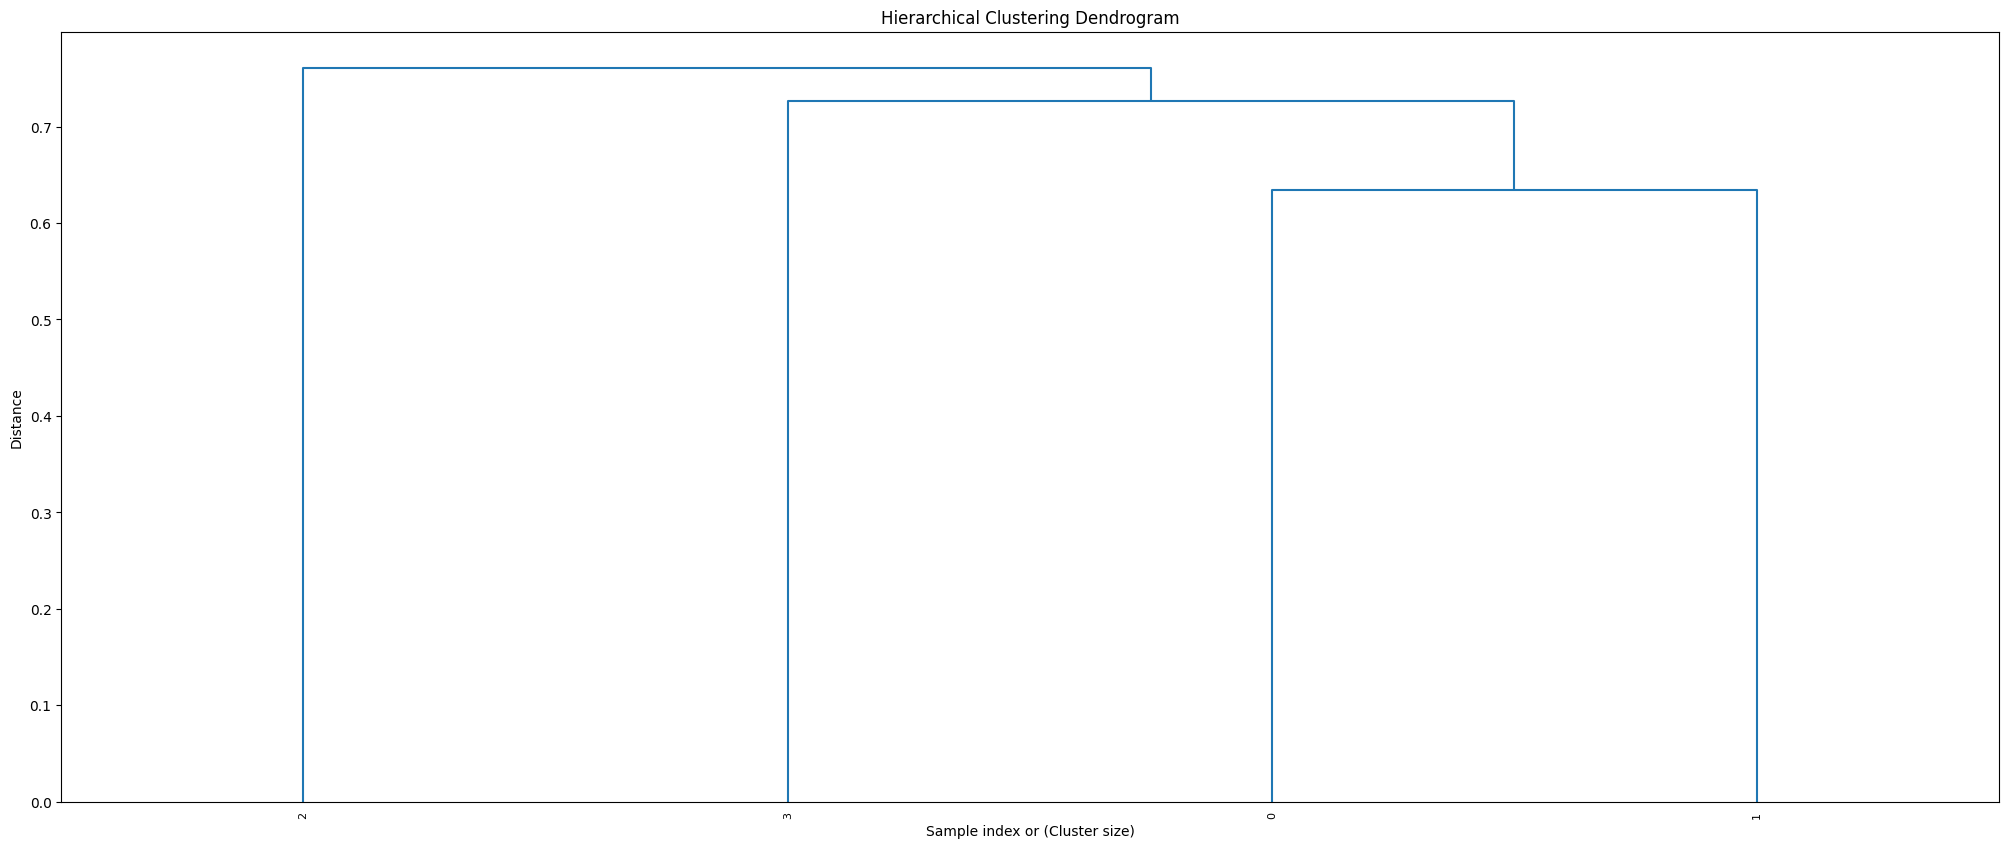

In [34]:
# Perform hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

Z = linkage(matrix, 'ward')

# Plot the dendrogram to visualize clusters
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()

In [35]:
len(df)

4

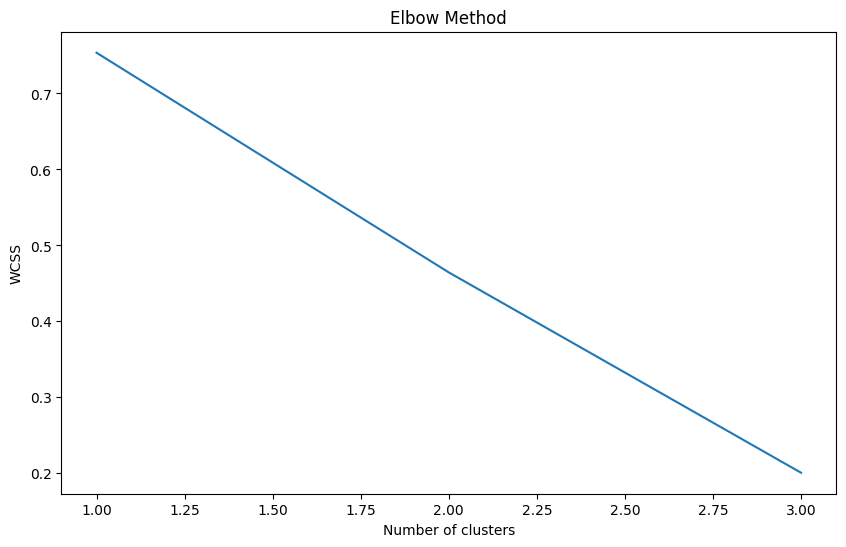

In [38]:
# Check with kmeans to be sure about amount of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'matrix' is the embeddings matrix obtained from get_openai_embeddings function
wcss = []
for i in range(1, 4):  # Test for k values from 1 to 10, adjust the range as necessary
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=15, random_state=0)
    kmeans.fit(matrix)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


In [ ]:
!pip install umap-learn


CLUSTER #  4


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


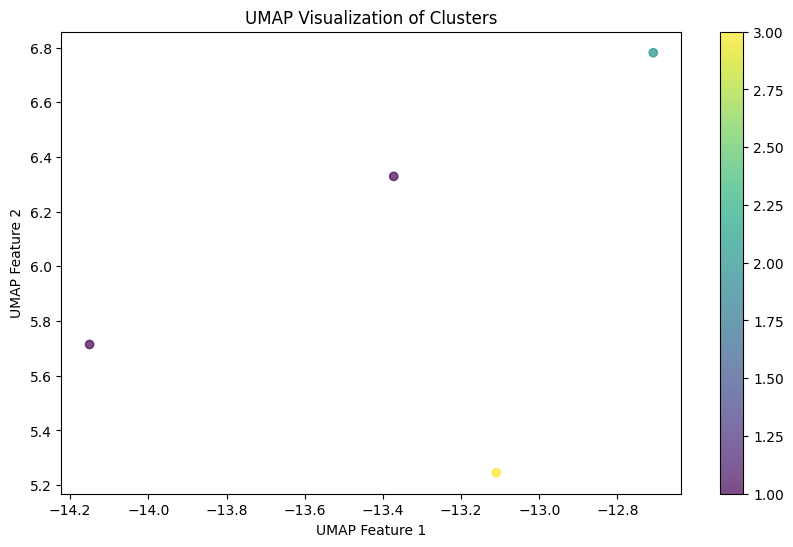

In [41]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, fcluster
import umap

# Assuming that 'matrix' is already defined and contains your embeddings
# Perform hierarchical clustering to define 'clusters'
Z = linkage(matrix, 'ward')
max_distance = 0.7  # You might need to adjust this based on your dendrogram analysis
clusters = fcluster(Z, max_distance, criterion='distance')
print("CLUSTER # ", len(clusters))
# Now perform UMAP dimensionality reduction
umap_reducer = umap.UMAP()
umap_result = umap_reducer.fit_transform(matrix)  # Using the embeddings matrix directly

# Now plot using UMAP results and the clusters defined above
plt.figure(figsize=(10, 6))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.show()


In [42]:
df.head()

,issue_title,issue_description,combined_text,reworked_information
0,[MBA#1127156] Layout-Anpassung auf Typo 3 - Webseite (KWI),"guten morgen ich habe eine eher spezielle anfrage von der kantonsschule wiedikon. die kantonsschule wiedikon w nscht eine layout anpassung f r mobile ger te zu machen f r das video welches auf der webseite der kwi baustand der hohlstrasse hochgeladen wurde. die kontaktperson bei fr heren anpassungen bei euch war noemi schmid. die schule w nscht nun eine kontaktaufnahme von euch mit herrn philippe da silva wong, tel. 044 457 71 53 um die einzelheiten zu besprechen. w re eine kontaktaufnahme seitens von euch m glich? dieses ticket eilt ein wenig da es schon l nger auf eine antwort wartet. ich habe das ticket am 27.02.2024 an euch weitergeleitet ohne r ckmeldung bis jetzt. freundliche gr sse kushtrim veliji bildungsdirektion kanton z rich mittelschul und berufsbildungsamt digital service center sek ii ausstellungsstrasse 80 8090 z rich telefon 043 259 77 27","title: [mba#1127156] layout-anpassung auf typo 3 - webseite (kwi). description: guten morgen ich habe eine eher spezielle anfrage von der kantonsschule wiedikon. die kantonsschule wiedikon w nscht eine layout anpassung f r mobile ger te zu machen f r das video welches auf der webseite der kwi baustand der hohlstrasse hochgeladen wurde. die kontaktperson bei fr heren anpassungen bei euch war noemi schmid. die schule w nscht nun eine kontaktaufnahme von euch mit herrn philippe da silva wong, tel. 044 457 71 53 um die einzelheiten zu besprechen. w re eine kontaktaufnahme seitens von euch m glich? dieses ticket eilt ein wenig da es schon l nger auf eine antwort wartet. ich habe das ticket am 27.02.2024 an euch weitergeleitet ohne r ckmeldung bis jetzt. freundliche gr sse kushtrim veliji bildungsdirektion kanton z rich mittelschul und berufsbildungsamt digital service center sek ii ausstellungsstrasse 80 8090 z rich telefon 043 259 77 27",- Issue: Support\n- Affected Systems: TYPO3 website (KWI)\n- Reported Problem: Request for a layout adjustment for mobile devices on the Kantonsschule Wiedikon (KWI) website. The contact person for previous adjustments was Noemi Schmid. The school now requires a contact with Mr. Philippe da Silva Wong at 044 457 71 53 to discuss the details. The ticket was forwarded on 27.02.2024 without any response yet. Action on this ticket is needed promptly.
1,[MBA#1128940] Zimbra Störung komplette Schule: E-Mails senden und empfangen (kslzh.ch) funktioniert nicht,"guten morgen allerseits schule kslzh melder laszlo cseri problem zimbra wir kslzh.ch k nnen keine e mails senden auch mails von gmx und icloud.com versendet und empfangen. im webmail erhalten wir folgende hinweise beim versenden von e mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! eine berpr fung mit mxtoolbox zeigt bei einem smtp check folgendes an !clipboard 202403250751 2pdnb.png! d rfen wir euch bitten, das problem sofort zu beheben? nachtrag bei meinen recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch domain auch betrifft !clipboard 202403250752 fxdsc.png!","title: [mba#1128940] zimbra störung komplette schule: e-mails senden und empfangen (kslzh.ch) funktioniert nicht. description: guten morgen allerseits schule kslzh melder laszlo cseri problem zimbra wir kslzh.ch k nnen keine e mails senden auch mails von gmx und icloud.com versendet und empfangen. im webmail erhalten wir folgende hinweise beim versenden von e mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! eine berpr fung mit mxtoolbox zeigt bei einem smtp check folgendes an !clipboard 202403250751 2pdnb.png! d rfen wir euch bitten, das problem sofort zu beheben? nachtrag bei meinen recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch domain auch betrifft !clipboard 202403250752 fxdsc.png!","- Issue: Email Delivery Issue\n- Affected Systems: Zimbra Email Servers\n- Reported Problem: Users at kslzh.ch are unable to send or receive

In [ ]:
df

In [43]:
### how many clusters do we have after the hierarchical clusteirng?
from scipy.cluster.hierarchy import fcluster
import numpy as np

# Assuming 'Z' is your linkage matrix from hierarchical clustering
# Specify the maximum cophenetic distance (this is an example value; adjust based on your dendrogram)


# Obtain the cluster labels
cluster_labels = fcluster(Z, max_distance, criterion='distance')

print(cluster_labels)
# Add the cluster labels to your DataFrame
#df['cluster_label'] = cluster_labels

# Count the unique cluster labels
num_clusters = np.unique(cluster_labels).size

print(f"Number of clusters formed: {num_clusters}")


[1 1 3 2]
Number of clusters formed: 3


In [44]:
import re

# Define a function to remove subtitles from the text
def remove_subtitles(text):
    patterns = ['problem', 'reported', 'systems', 'ticket', 'summary', 'affected systems:', 'reported problem:', 'user', 'issue']
    for pattern in patterns:
        text = re.sub(pattern, '', text)
    return text.strip()

# Apply the function to each ticket
df['cleaned_information'] = df['reworked_information'].apply(remove_subtitles)

# Now you can proceed with using 'cleaned_information' for generating embeddings


SHOWING IN A WORD CLOUD - CLUSTERS

In [ ]:
!pip install wordcloud

In [45]:
len(df)

4

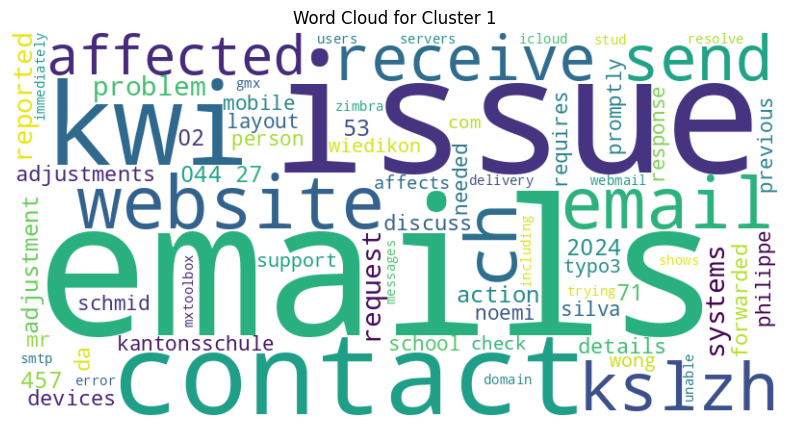

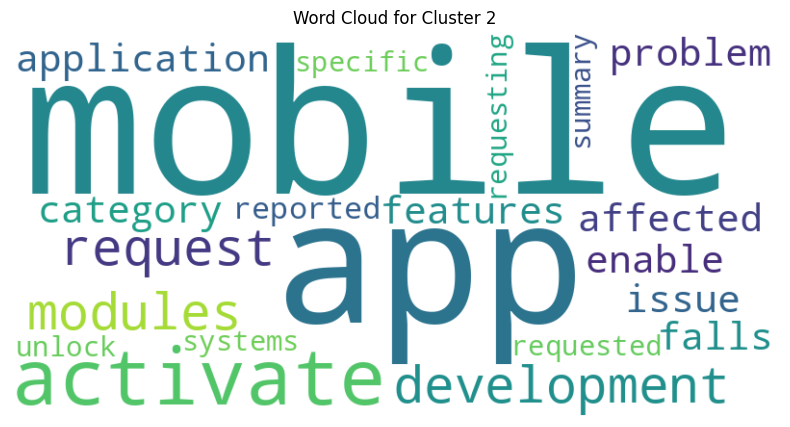

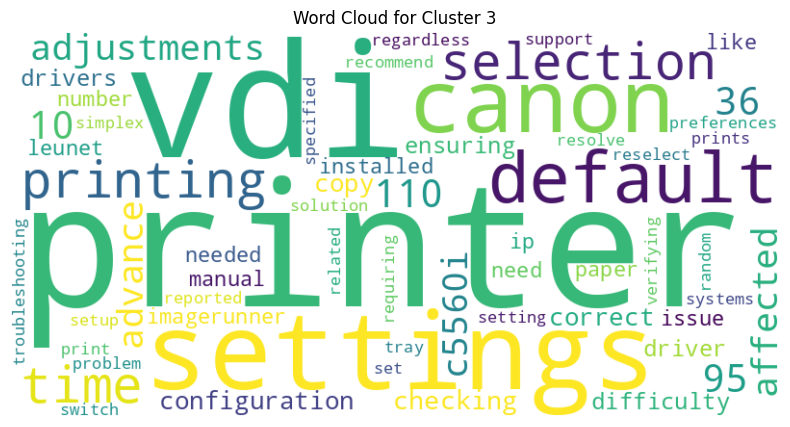

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'clusters' contains cluster labels
df['cluster_label'] = clusters
unique_clusters = np.unique(clusters)

for cluster_num in unique_clusters:
    cluster_data = df[df['cluster_label'] == cluster_num]
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data['cleaned_information'])
    terms = tfidf_vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1

    # Create a dictionary of word frequencies for word cloud
    freqs = dict(zip(terms, scores))

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freqs)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'clusters' contains cluster labels
df['cluster_label'] = clusters
unique_clusters = np.unique(clusters)

labels = []
for cluster_num in unique_clusters:
    cluster_data = df[df['cluster_label'] == cluster_num]
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data['cleaned_information'])
    order = tfidf_matrix.sum(axis=0).argsort()[0, ::-1]
    terms = np.array(tfidf_vectorizer.get_feature_names_out())[order].flat[:5]  # Top 5 terms
    label = ', '.join(terms)
    labels.append(label)
    print(f"Cluster {cluster_num} label: {label}")


Cluster 1 label: emails, issue, kwi, website, contact
Cluster 2 label: mobile, app, request, development, modules
Cluster 3 label: printer, vdi, settings, default, time


CATEGORIZING NEW TICKETS TO ONE OF THE CLUSTERS WITHOUT THE NEED OF DOING THE WHOLE CLUSTERSTUFF ETC AGAIN

INITIAL PATH EXISTS
This ticket might belong to a new cluster.


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


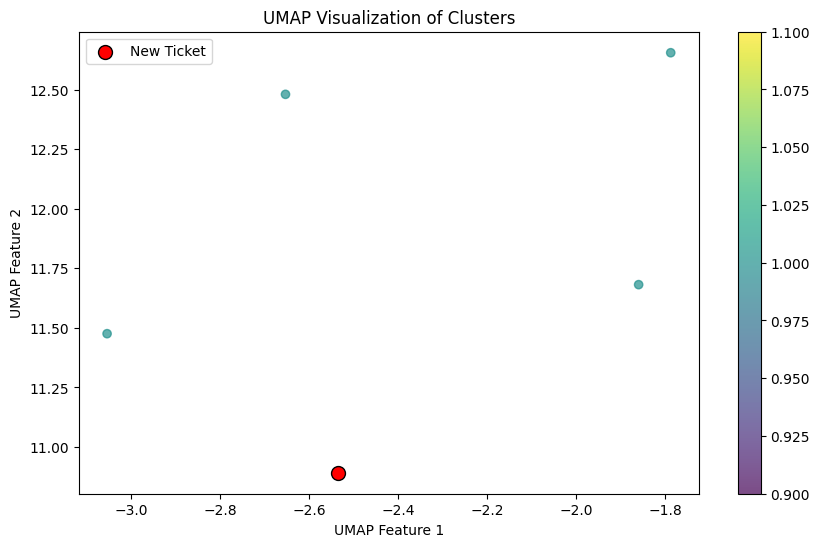

In [60]:
import numpy as np
import openai
import os
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import fcluster, linkage

def get_openai_embeddings_addon(texts, initial_path, update_path):
    # Check and load initial embeddings or initialize an empty array
    if os.path.exists(initial_path):
        embeddings = np.load(initial_path)
        print("INITIAL PATH EXISTS")
    else:
        embeddings = np.array([]).reshape(0, 1536)  # Adjust to the correct dimension

    new_embeddings = []
    for text in texts:
        response = openai.Embedding.create(input=text, engine="text-embedding-ada-002")
        new_embeddings.append(response['data'][0]['embedding'])

    # Combine new embeddings with existing ones
    if new_embeddings:
        new_embeddings = np.array(new_embeddings)
        embeddings = np.vstack([embeddings, new_embeddings]) if embeddings.size else new_embeddings

    # Save updated embeddings
    np.save(update_path, embeddings)
    return embeddings

def check_new_ticket(new_ticket_text, df, initial_path, update_path, threshold=0.2):
    # Generate or update embeddings
    new_embedding = get_openai_embeddings_addon([new_ticket_text], initial_path, update_path)[-1]
    existing_embeddings = np.load(update_path)[:-1]  # Exclude the new one

    if existing_embeddings.size == 0:
        print("No existing tickets to compare. New ticket is the first entry.")
        new_label = 0
    else:
        min_distance = euclidean_distances([new_embedding], existing_embeddings).min()
        if min_distance > threshold:
            new_label = df['cluster_label'].max() + 1 if 'cluster_label' in df.columns else 0
            print("This ticket might belong to a new cluster.")
        else:
            new_label = df['cluster_label'].mode()[0]  # Assign to the most common existing cluster or a default
            print("This ticket belongs to an existing cluster.")

    df.loc[len(df)] = {'processed_text': new_ticket_text, 'cluster_label': new_label}
    return df

# Example usage
initial_path = './drive/Othercomputers/X1/code/embeddings/embeddings-initial.npy'
update_path = './drive/Othercomputers/X1/code/embeddings/embeddings-updated.npy'
new_ticket = "problems with mobile app."
df = check_new_ticket(new_ticket, df, initial_path, update_path)

# Load embeddings for clustering and visualization
embeddings = np.load(update_path)
if embeddings.size > 0:
    Z = linkage(embeddings, 'ward')
    clusters = fcluster(Z, 2, criterion='distance')
    new_ticket_index = len(embeddings) - 1  # Assuming the new ticket is the last one added
    plot_umap(embeddings, clusters, new_ticket_index)
else:
    print("No embeddings to analyze.")